In [87]:
#Import the usual suspects
import json
import pandas as pd
from datetime import datetime

In [88]:
# Opening JSON file 
f = open('StreamingHistory0.json',) 
  
# return JSON object as a dictionary 
spot_data = json.load(f) 

# Close file 
f.close() 

In [90]:
# make a DataFrame
df = pd.DataFrame.from_dict(data=spot_data, orient='columns', dtype=None, columns=None) 

In [91]:
# check out said DataFrame
df

,endTime,artistName,trackName,msPlayed
0,2019-05-21 19:35,Far Out,Chains,40809
1,2019-06-10 20:34,Lauren Dair,Every Little Light,175007
2,2019-06-10 20:38,Lauren Dair,Lines,204635
3,2019-06-26 20:32,Mary J. Blige,Real Love,269973
4,2019-06-26 20:33,New Kids On The Block,Tonight,24861
...,...,...,...,...
5240,2020-06-02 20:51,Låpsley,Ligne 3,196420
5241,2020-06-02 20:52,Låpsley,Leeds Liverpool Canal,23614
5242,2020-06-02 20:55,Låpsley,Sadness is a Shade of Blue,217813
5243,2020-06-02 20:56,Låpsley,Womxn,68872


In [92]:
# Let's see what's going on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     5245 non-null   object
 1   artistName  5245 non-null   object
 2   trackName   5245 non-null   object
 3   msPlayed    5245 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 164.0+ KB


In [93]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
# I spent a lot of milliseconds listening to Spotify!
df.msPlayed.sum()

1627483435

In [95]:
# That's a lot of minutes, for only a few months
df['min_played'] = df.msPlayed.apply(lambda min: min/1000/60)
df['min_played'].sum()

27124.723916666662

In [96]:
# per day, that's a full cd's worth of listening.
df['min_played'].sum()/365

74.3143121004566

In [97]:
#I listened to a lot of artists!
df.artistName.nunique()

1319

In [116]:
# my top 20 - lots of podcasts!
df.artistName.value_counts().head(20)

The Coronavirus Newscast               127
Taylor Swift                           102
Rolling Stone Music Now                 77
How Did This Get Made?                  73
Unknown Artist                          68
MUNA                                    64
The Writers Panel                       59
Switched on Pop                         56
Billie Eilish                           51
Radiolab                                50
CHVRCHES                                49
Andy Shauf                              47
Beck                                    46
Unspooled                               46
Bombay Bicycle Club                     46
Hania Rani                              45
Crazy Ex-Girlfriend Cast                44
Fleetwood Mac                           44
Sodajerker On Songwriting               43
Halsey                                  42
And The Writer Is...with Ross Golan     41
Selena Gomez                            41
Tara Brach                              41
Wye Oak    

In [98]:
# let's convert our date column is in the right format
df['endTime'] = pd.to_datetime(df['endTime']) 

In [110]:
df.head(10)

,endTime,artistName,trackName,msPlayed,min_played
0,2019-05-21 19:35:00,Far Out,Chains,40809,0.680150
1,2019-06-10 20:34:00,Lauren Dair,Every Little Light,175007,2.916783
2,2019-06-10 20:38:00,Lauren Dair,Lines,204635,3.410583
3,2019-06-26 20:32:00,Mary J. Blige,Real Love,269973,4.499550
4,2019-06-26 20:33:00,New Kids On The Block,Tonight,24861,0.414350
5,2019-06-26 20:37:00,Bobby Brown,Rock Wit'cha,289533,4.825550
6,2019-06-26 20:43:00,Oasis,Wonderwall - Remastered,258732,4.312200
7,2019-06-26 20:49:00,Prince,When Doves Cry,352906,5.881767
8,2019-06-26 20:52:00,Cocteau Twins,Cherry-coloured Funk,192466,3.207767
9,2019-06-26 21:00:00,Tears For Fears,Sowing The Seeds Of Love,376733,6.278883


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     5245 non-null   datetime64[ns]
 1   artistName  5245 non-null   object        
 2   trackName   5245 non-null   object        
 3   msPlayed    5245 non-null   int64         
 4   min_played  5245 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 205.0+ KB


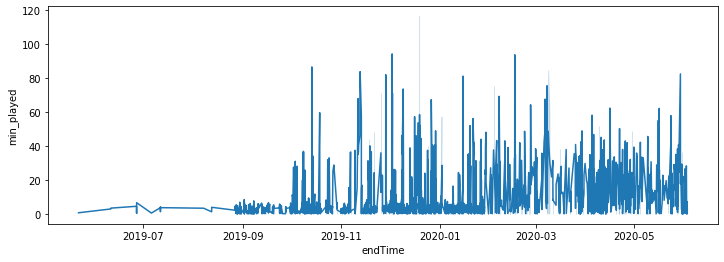

In [121]:
plt.figure(figsize=(12,4))
sns.lineplot(x='endTime',y='min_played',data=df)